# Import
---

In [25]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split

# Data
---

In [26]:
# this URL doesnt work directly with pd.read_csv
!wget https://lazyprogrammer.me/course_files/spam.csv

--2020-09-20 15:41:37--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.80.48, 172.67.213.166, 104.31.81.48, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.80.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv.1’

spam.csv.1          100%[===================>] 491.86K  --.-KB/s    in 0.06s   

2020-09-20 15:41:37 (8.54 MB/s) - ‘spam.csv.1’ saved [503663/503663]



In [27]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [28]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
df.columns=['labels', 'data']
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
# create binary labels
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

In [31]:
# split data
X_train, X_test, y_train, y_test = train_test_split(df['data'], Y, test_size=0.33)

In [32]:
# convert sentences to sequences
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(X_train)
sequence_train = tokenizer.texts_to_sequences(X_train)
sequence_test = tokenizer.texts_to_sequences(X_test)

In [33]:
# get word mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print(f'{V} unique tokens in')

7244 unique tokens in


In [34]:
# pad sequences so we get N x T matrix
X_train = pad_sequences(sequence_train)
print('shape of data train tensor: ', data_train.shape)

# get sequence length
T = X_train.shape[1]

shape of data train tensor:  (3733, 162)


In [35]:
X_test = pad_sequences(sequence_test, maxlen=T)
print('shape of data test tensor: ', X_test.shape)

shape of data test tensor:  (1839, 189)


# Model
---

Epoch 1/10
117/117 [==============================] - 4s 38ms/step - loss: 0.4833 - accuracy: 0.8628 - val_loss: 0.3820 - val_accuracy: 0.8722
Epoch 2/10
117/117 [==============================] - 4s 35ms/step - loss: 0.3793 - accuracy: 0.8628 - val_loss: 0.3458 - val_accuracy: 0.8722
Epoch 3/10
117/117 [==============================] - 4s 35ms/step - loss: 0.3150 - accuracy: 0.8628 - val_loss: 0.2702 - val_accuracy: 0.8722
Epoch 4/10
117/117 [==============================] - 4s 35ms/step - loss: 0.2316 - accuracy: 0.8709 - val_loss: 0.1827 - val_accuracy: 0.9434
Epoch 5/10
117/117 [==============================] - 4s 35ms/step - loss: 0.1309 - accuracy: 0.9850 - val_loss: 0.1197 - val_accuracy: 0.9810
Epoch 6/10
117/117 [==============================] - 4s 35ms/step - loss: 0.0789 - accuracy: 0.9914 - val_loss: 0.0934 - val_accuracy: 0.9837
Epoch 7/10
117/117 [==============================] - 4s 35ms/step - loss: 0.0547 - accuracy: 0.9933 - val_loss: 0.0854 - val_accuracy: 0.9831

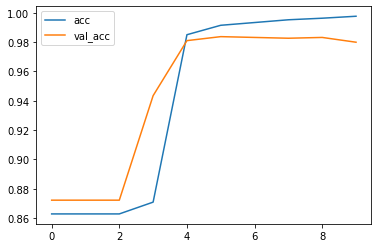

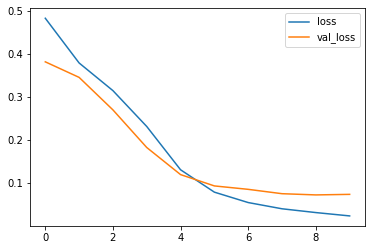

In [39]:
D = 20  # embadding dimension
M = 15  # hidden state dimension

# we actually want to the size of the embadding to (V + 1) x D,
# because the first index starts from 1 and not 0
# thus, if the final index of the embadding matrix is V,
# then it actually must have size V + 1

# Build
i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)

# Compile
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

# Plot
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()